<a href="https://colab.research.google.com/github/bintangnabiil/Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-TensorFlow/blob/main/Rangkuman_Chapter_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chapter 9: Unsupervised Learning Techniques
Unsupervised learning adalah cabang machine learning yang bekerja dengan data tanpa label. Tujuan utamanya adalah menemukan pola tersembunyi, struktur, atau representasi yang berguna dari data. Berbeda dengan supervised learning, unsupervised learning tidak memiliki target variable yang jelas untuk diprediksi.

###Kategori Utama Unsupervised Learning:

- Clustering: Mengelompokkan data yang serupa
- Association Rule Learning: Menemukan hubungan antar fitur
- Dimensionality Reduction: Mengurangi jumlah fitur (sudah dibahas di Chapter 8)
- Anomaly Detection: Mendeteksi data yang tidak normal
- Density Estimation: Memperkirakan distribusi probabilitas data

<br><br>
##Clustering Algorithms
Clustering adalah teknik untuk mengelompokkan data points yang serupa ke dalam cluster yang sama, sementara data points yang berbeda dipisahkan ke cluster yang berbeda.

##1. K-Means Clustering
K-Means adalah algoritma clustering yang paling populer dan sederhana. Algoritma ini bekerja dengan membagi data menjadi k cluster dengan meminimalkan within-cluster sum of squares (WCSS).

###Cara Kerja K-Means:

- Inisialisasi: Pilih k centroid secara random
- Assignment: Assign setiap data point ke centroid terdekat
- Update: Hitung ulang posisi centroid berdasarkan rata-rata cluster
- Repeat: Ulangi langkah 2-3 hingga konvergen

###Keuntungan K-Means:

- Sederhana dan cepat
- Bekerja baik pada cluster yang spherical dan sama ukuran
- Skalabel untuk dataset besar

###Kekurangan K-Means:

- Harus menentukan k terlebih dahulu
- Sensitive terhadap inisialisasi
- Tidak bekerja baik pada cluster dengan bentuk non-spherical
- Sensitive terhadap outliers

##2. DBSCAN (Density-Based Spatial Clustering)
DBSCAN adalah algoritma clustering berbasis density yang dapat menemukan cluster dengan bentuk arbitrary dan mengdeteksi outliers.

###Konsep Utama DBSCAN:

- Core Point: Point yang memiliki minimal MinPts neighbors dalam radius Eps
- Border Point: Point yang bukan core point tapi berada dalam radius Eps dari core point
- Noise Point: Point yang bukan core maupun border point

###Keuntungan DBSCAN:

- Tidak perlu menentukan jumlah cluster
- Dapat menemukan cluster dengan bentuk arbitrary
- Robust terhadap outliers
- Otomatis mendeteksi noise

###Kekurangan DBSCAN:

- Sensitive terhadap parameter Eps dan MinPts
- Kesulitan dengan cluster yang memiliki density berbeda
- Performa menurun pada dimensi tinggi

##3. Hierarchical Clustering
Hierarchical clustering membangun hirarki cluster baik secara bottom-up (agglomerative) maupun top-down (divisive).

###Agglomerative Hierarchical Clustering:

- Mulai dengan setiap point sebagai cluster terpisah
- Gabungkan dua cluster terdekat
- Ulangi hingga semua point dalam satu cluster

###Linkage Criteria:

- Single Linkage: Jarak minimum antar cluster
- Complete Linkage: Jarak maximum antar cluster
- Average Linkage: Jarak rata-rata antar cluster
- Ward Linkage: Meminimalkan variance dalam cluster

##4. Gaussian Mixture Models (GMM)
GMM adalah model probabilistik yang mengasumsikan data berasal dari campuran beberapa distribusi Gaussian. GMM menggunakan Expectation-Maximization (EM) algorithm untuk pembelajaran.

###Keuntungan GMM:

- Memberikan probabilitas keanggotaan cluster (soft clustering)
- Dapat menangani cluster dengan bentuk elliptical
- Memberikan informasi tentang distribusi data

###Kekurangan GMM:

- Memerlukan spesifikasi jumlah komponen
- Komputasi lebih mahal daripada K-Means
- Sensitive terhadap inisialisasi

##5. Anomaly Detection
Anomaly detection adalah teknik untuk mengidentifikasi data points yang signifikan berbeda dari mayoritas data. Aplikasi umum meliputi fraud detection, network intrusion detection, dan quality control.

###Teknik Anomaly Detection:
- Statistical Approach

  - Menggunakan distribusi statistik untuk mengidentifikasi outliers
  - Metode: Z-score, Interquartile Range (IQR)

- Isolation Forest

  - Menggunakan ensemble of isolation trees
  - Anomali lebih mudah diisolasi (membutuhkan fewer splits)

- One-Class SVM

  - Melatih SVM hanya pada data normal
  - Mengidentifikasi region yang berisi mayoritas data

- Local Outlier Factor (LOF)

  - Membandingkan density lokal dengan tetangga
  - Mengidentifikasi outliers berdasarkan perbedaan density

#Implementasi Kode
##1. Dataset Preparation

=== Preparasi Dataset ===


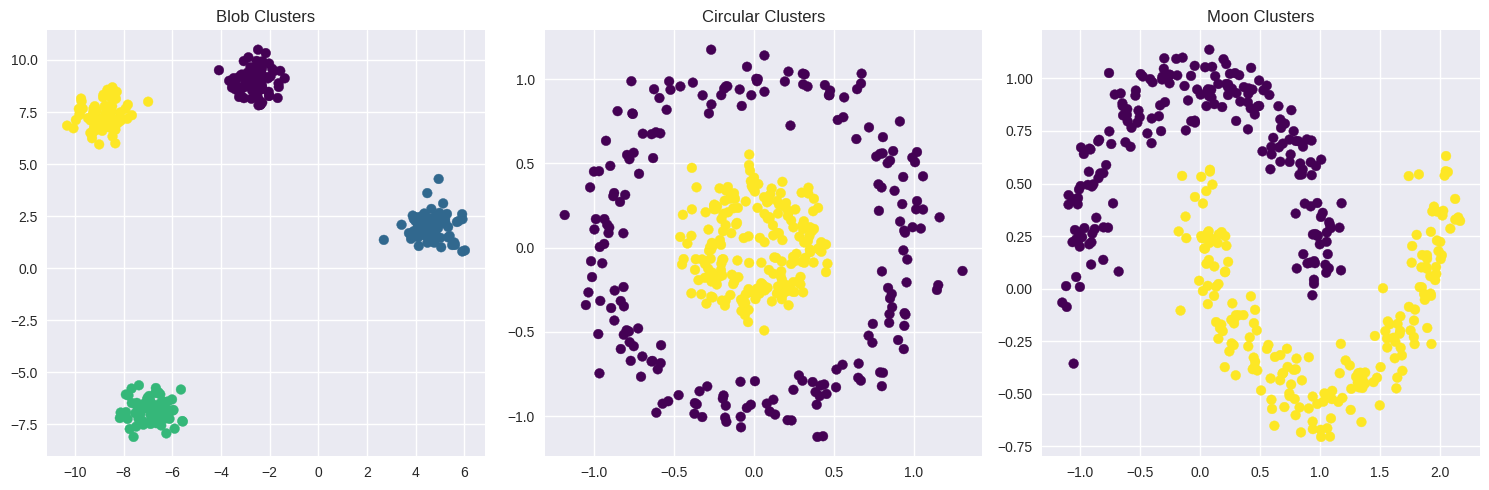

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_circles, make_moons, load_digits
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.decomposition import PCA
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
plt.style.use('seaborn-v0_8')
np.random.seed(42)

# 1. DATASET PREPARATION
print("=== Preparasi Dataset ===")

# Dataset 1: Blob clusters (cocok untuk K-Means)
X_blobs, y_blobs = make_blobs(n_samples=300, centers=4, cluster_std=0.60,
                              random_state=42)

# Dataset 2: Circular clusters (challenging untuk K-Means)
X_circles, y_circles = make_circles(n_samples=400, factor=0.3, noise=0.1,
                                    random_state=42)

# Dataset 3: Moon-shaped clusters
X_moons, y_moons = make_moons(n_samples=400, noise=0.1, random_state=42)

# Visualisasi datasets
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_blobs, cmap='viridis')
axes[0].set_title('Blob Clusters')

axes[1].scatter(X_circles[:, 0], X_circles[:, 1], c=y_circles, cmap='viridis')
axes[1].set_title('Circular Clusters')

axes[2].scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap='viridis')
axes[2].set_title('Moon Clusters')

plt.tight_layout()
plt.show()


##2. K-Means Clustering


=== K-Means Clustering ===
Analisis K-Means pada Blob Dataset:


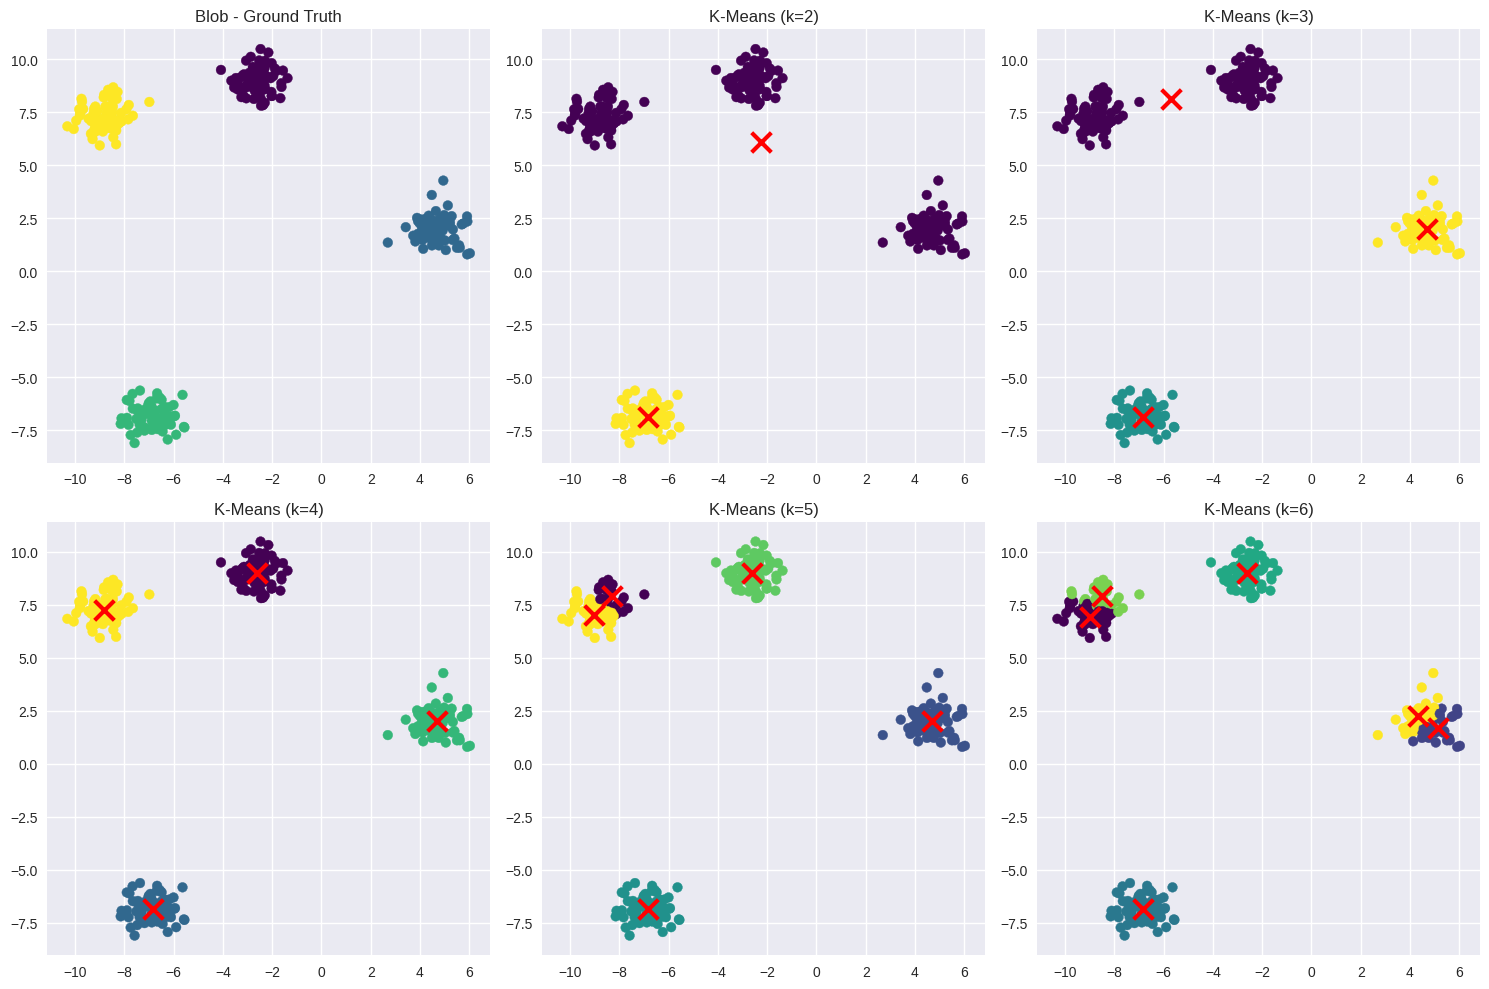

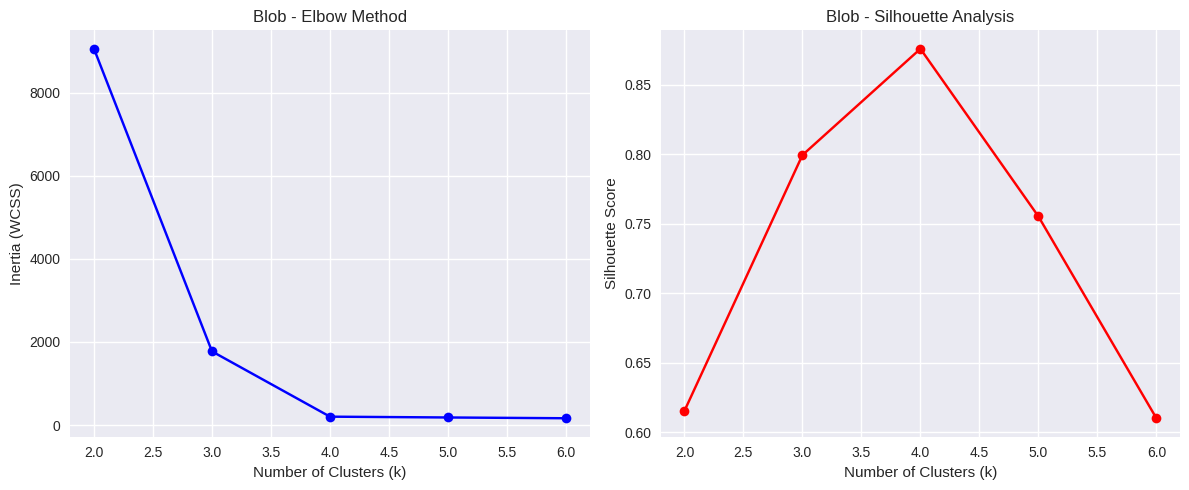

Analisis K-Means pada Circle Dataset:


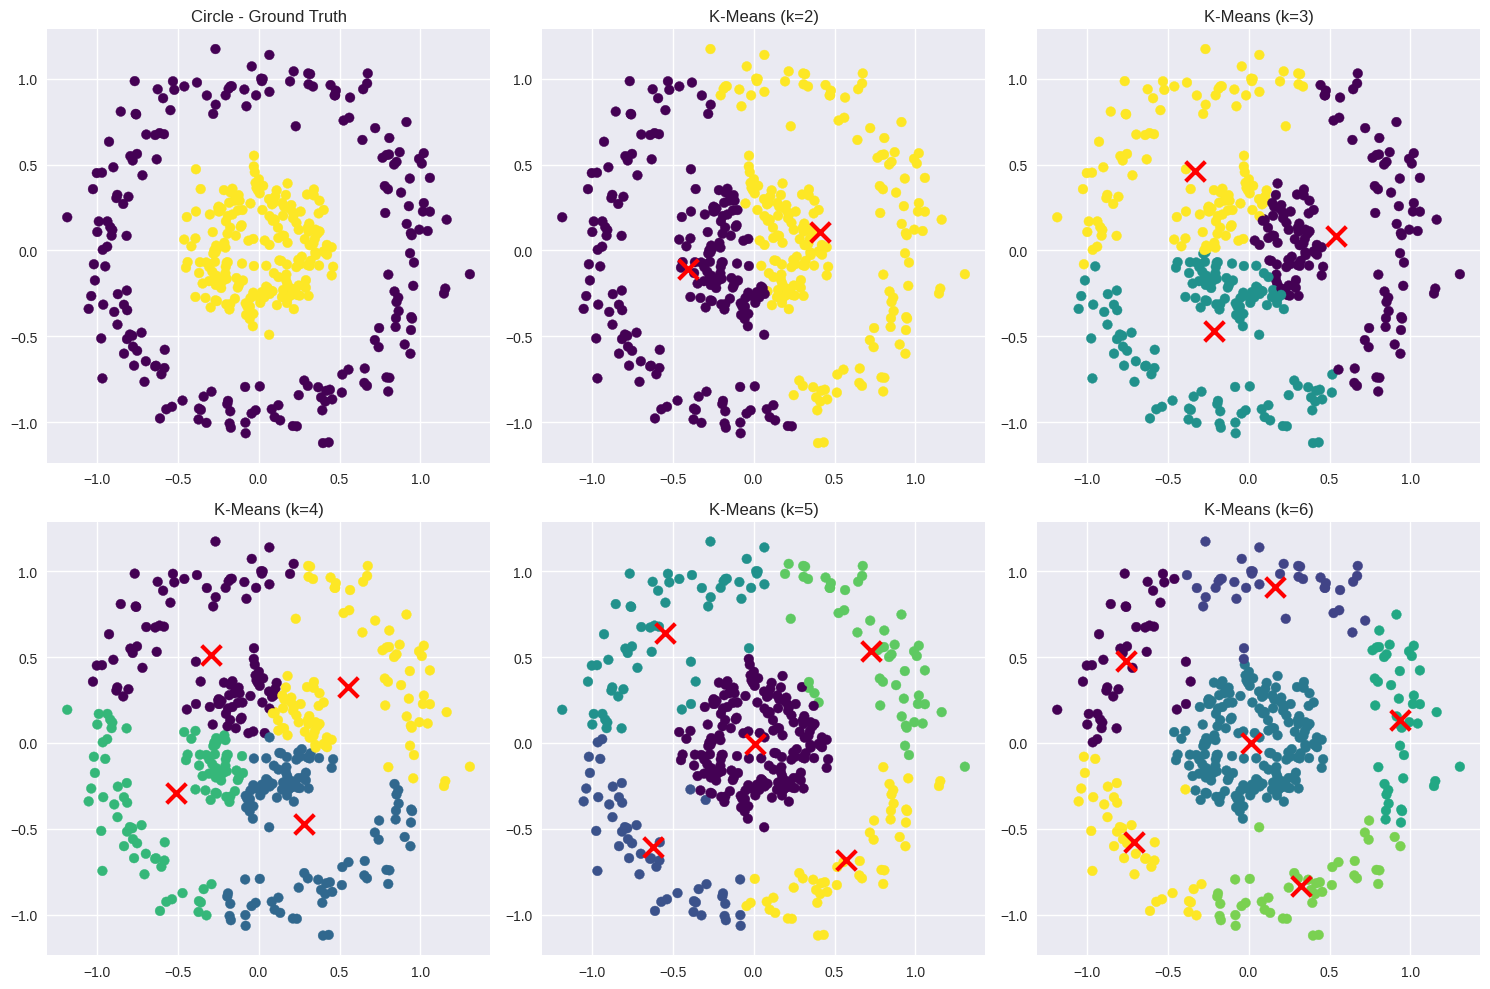

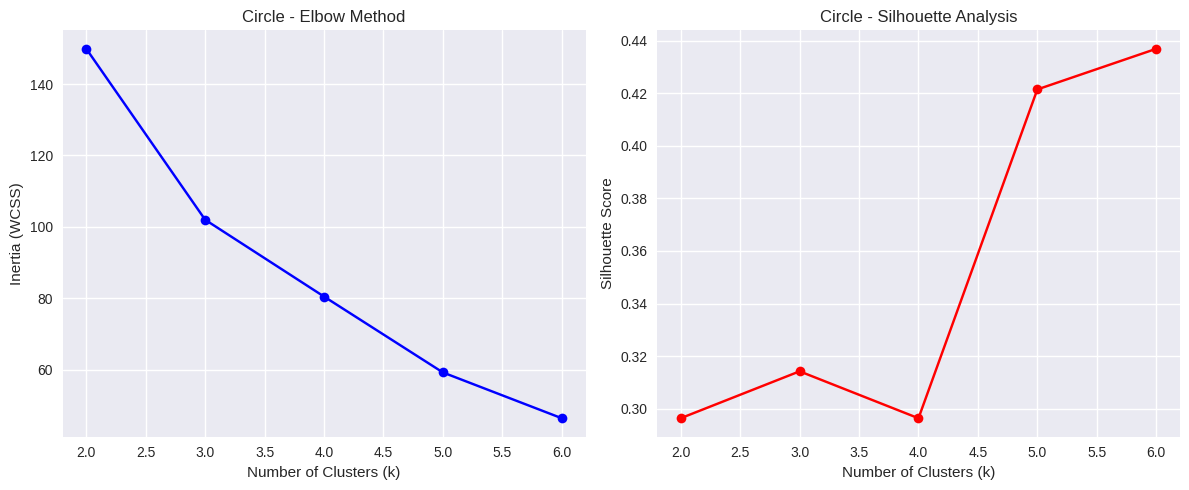

In [2]:
# 2. K-MEANS CLUSTERING
print("\n=== K-Means Clustering ===")

def plot_kmeans_results(X, y_true, title):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))

    # Ground truth
    axes[0, 0].scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis')
    axes[0, 0].set_title(f'{title} - Ground Truth')

    # K-Means dengan berbagai k
    k_values = [2, 3, 4, 5, 6]
    inertias = []
    silhouette_scores = []

    for i, k in enumerate(k_values):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        y_pred = kmeans.fit_predict(X)

        # Plot hasil clustering
        row, col = (i+1) // 3, (i+1) % 3
        axes[row, col].scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
        axes[row, col].scatter(kmeans.cluster_centers_[:, 0],
                              kmeans.cluster_centers_[:, 1],
                              c='red', marker='x', s=200, linewidths=3)
        axes[row, col].set_title(f'K-Means (k={k})')

        # Hitung metrics
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X, y_pred))

    plt.tight_layout()
    plt.show()

    # Elbow method dan silhouette analysis
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Elbow method
    ax1.plot(k_values, inertias, 'bo-')
    ax1.set_xlabel('Number of Clusters (k)')
    ax1.set_ylabel('Inertia (WCSS)')
    ax1.set_title(f'{title} - Elbow Method')
    ax1.grid(True)

    # Silhouette score
    ax2.plot(k_values, silhouette_scores, 'ro-')
    ax2.set_xlabel('Number of Clusters (k)')
    ax2.set_ylabel('Silhouette Score')
    ax2.set_title(f'{title} - Silhouette Analysis')
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

    return k_values, inertias, silhouette_scores

# Analisis K-Means pada berbagai dataset
print("Analisis K-Means pada Blob Dataset:")
k_vals_blob, inertias_blob, sil_blob = plot_kmeans_results(X_blobs, y_blobs, "Blob")

print("Analisis K-Means pada Circle Dataset:")
k_vals_circle, inertias_circle, sil_circle = plot_kmeans_results(X_circles, y_circles, "Circle")

##3. DBSCAN Clustering


=== DBSCAN Clustering ===


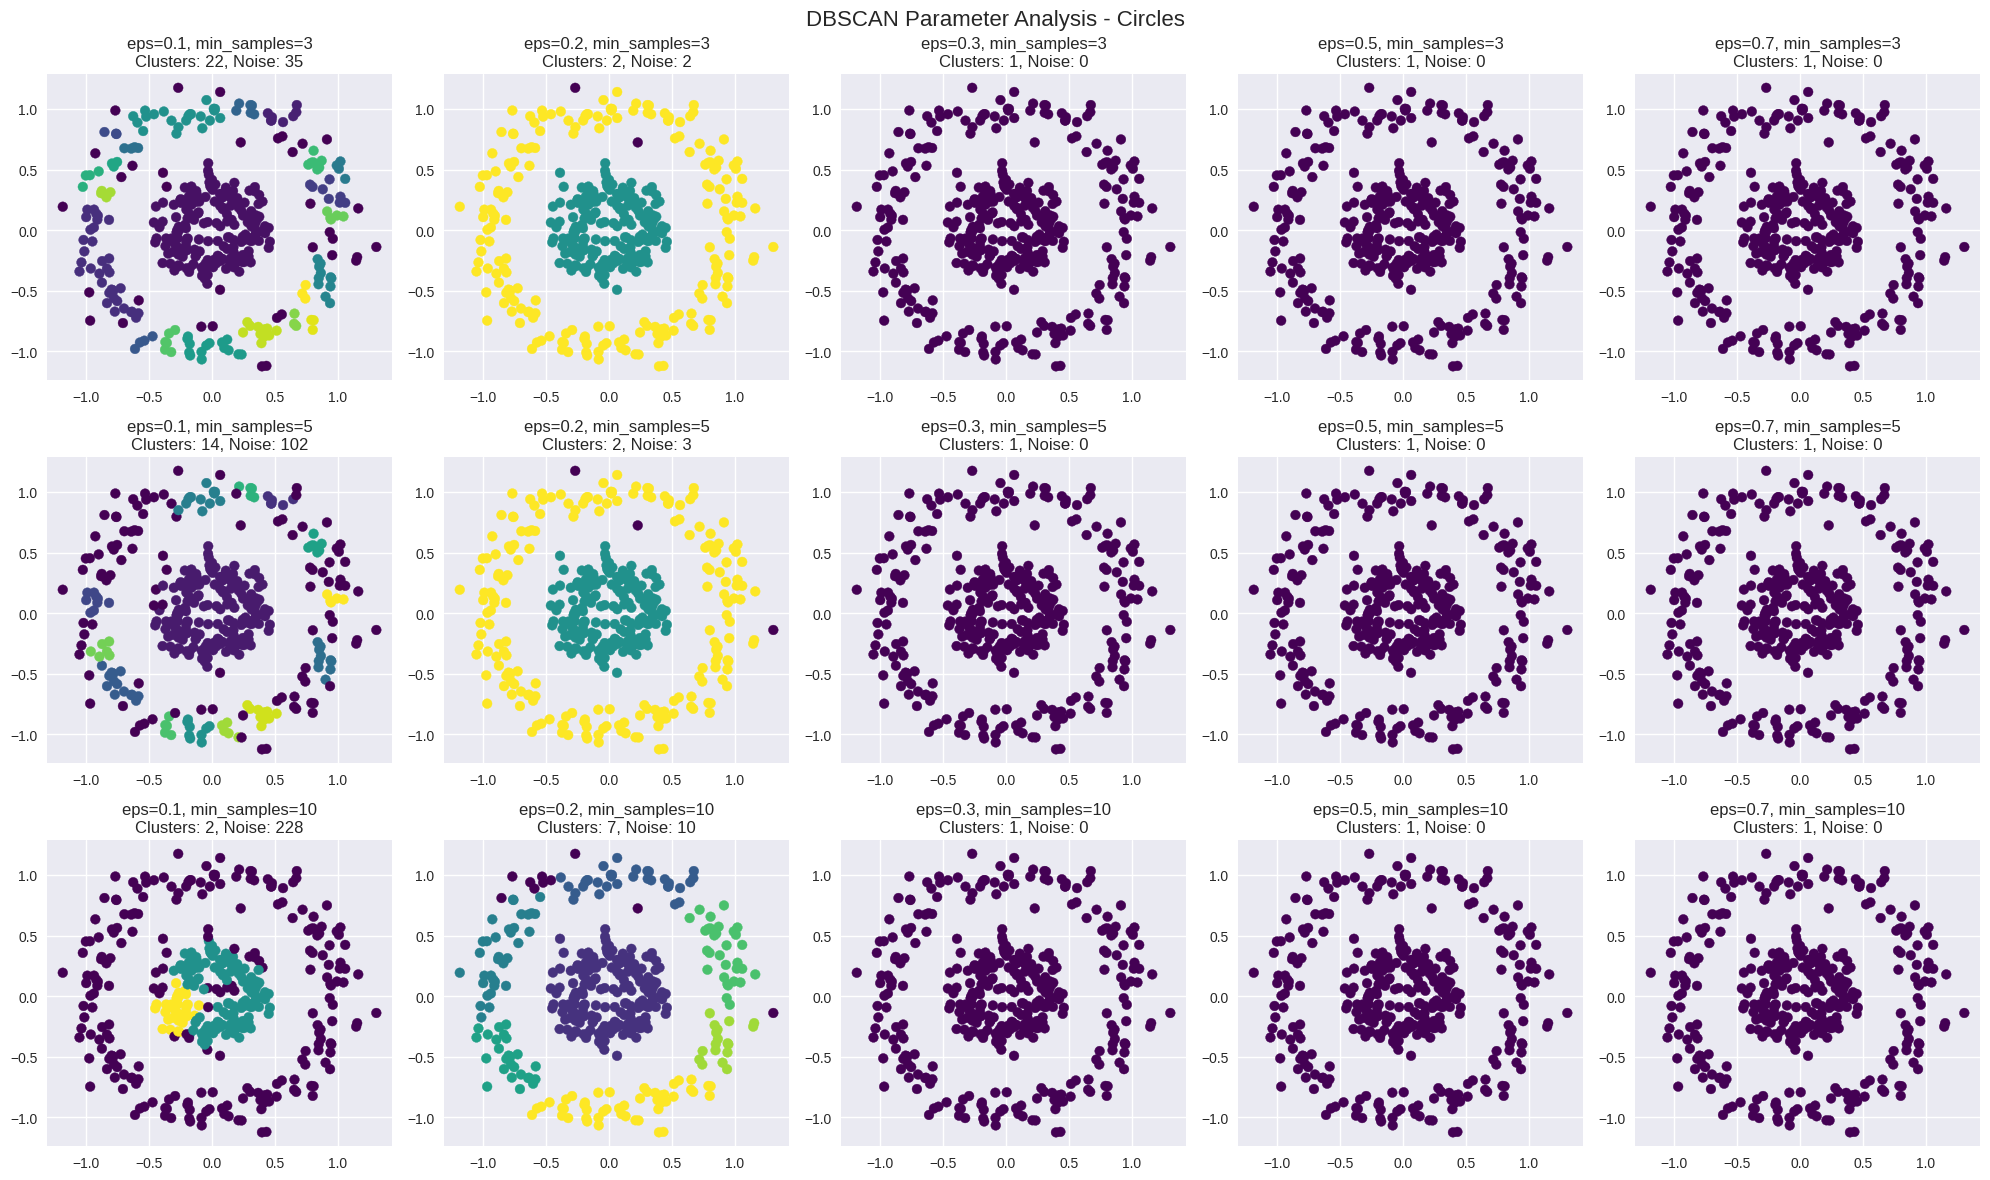

Best DBSCAN parameters for Circles:
eps: 0.2, min_samples: 10
Best silhouette score: 0.396


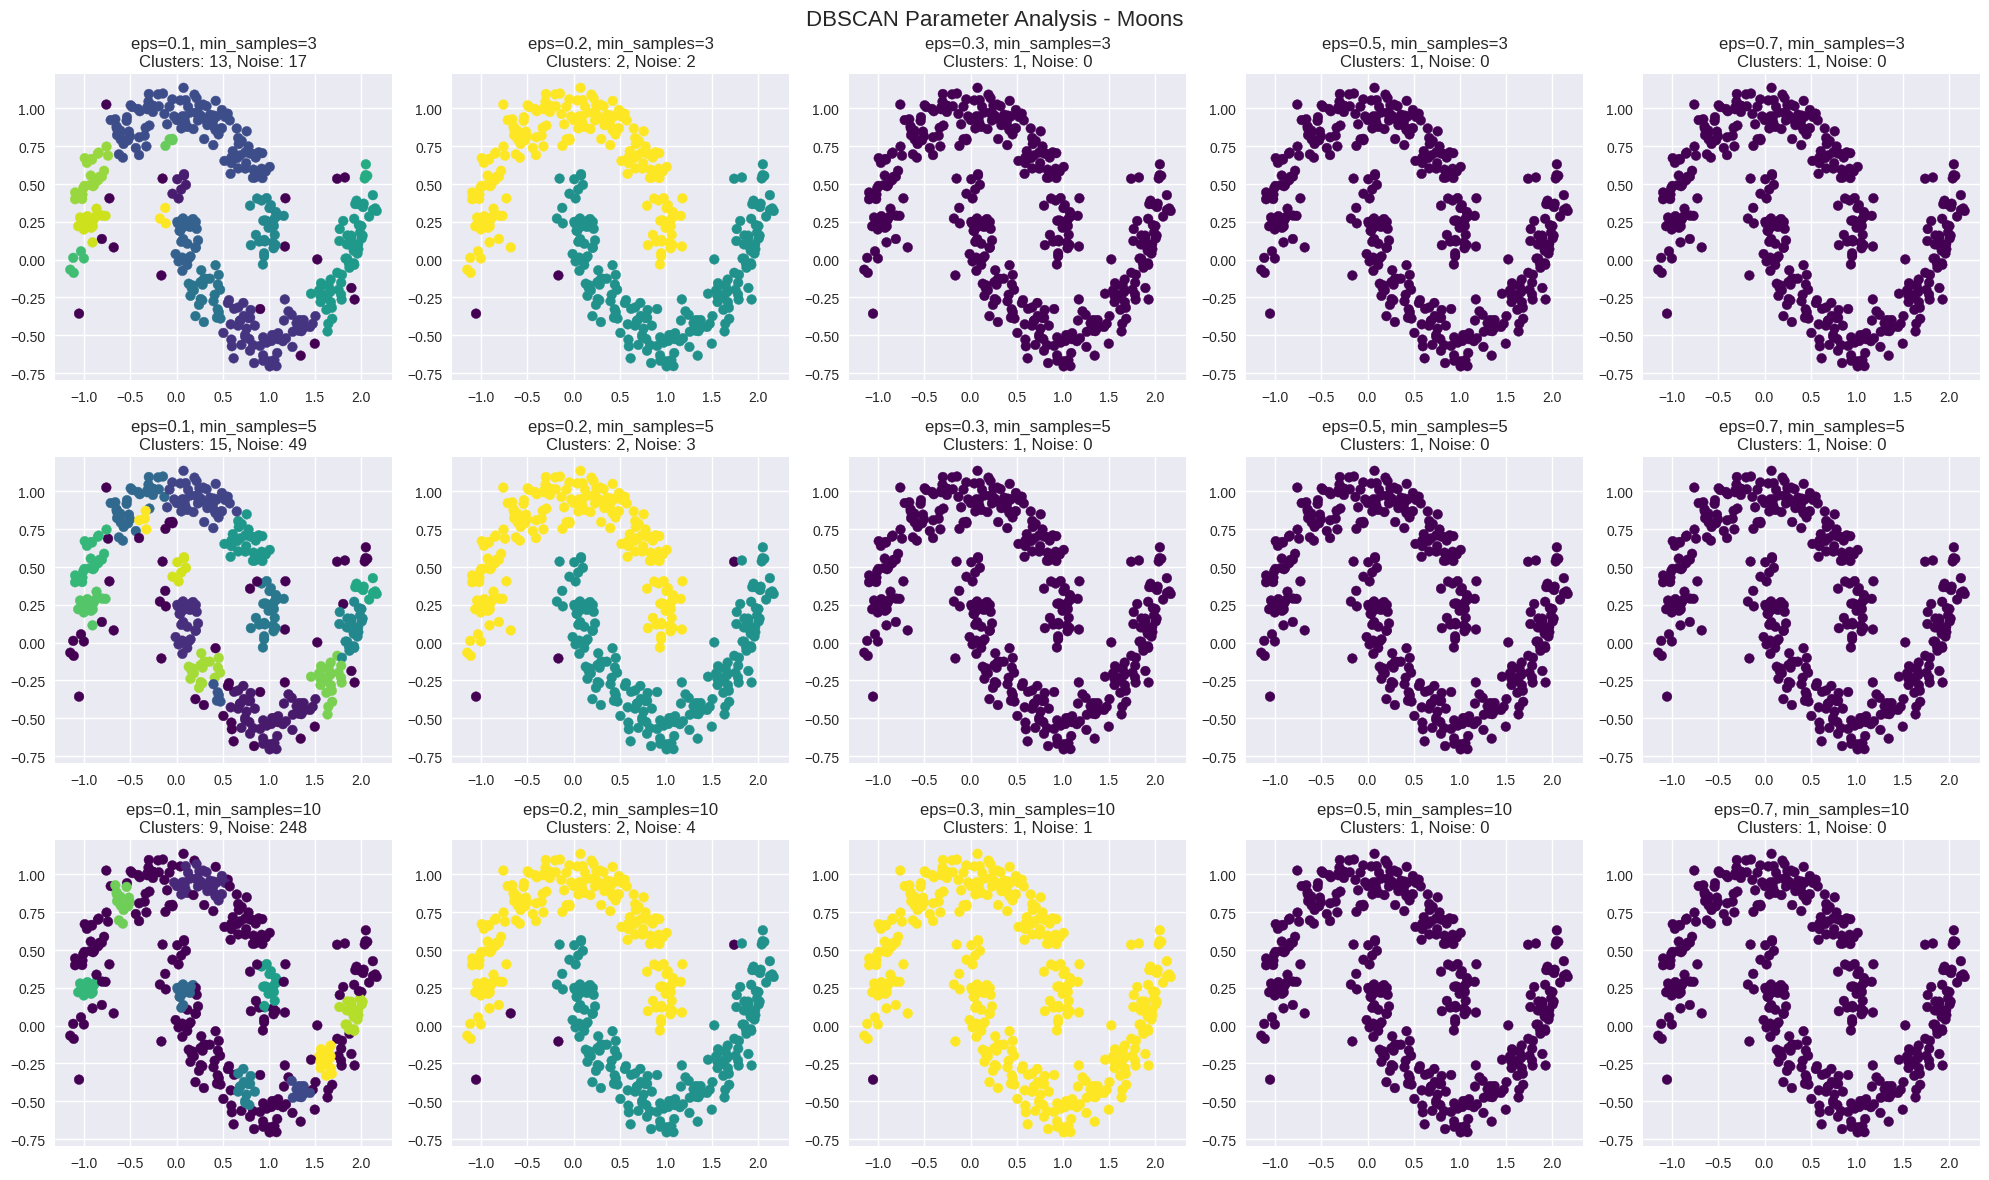

Best DBSCAN parameters for Moons:
eps: 0.2, min_samples: 5
Best silhouette score: 0.263


In [3]:
# 3. DBSCAN CLUSTERING
print("\n=== DBSCAN Clustering ===")

def analyze_dbscan(X, y_true, title):
    # Grid search untuk parameter DBSCAN
    eps_values = [0.1, 0.2, 0.3, 0.5, 0.7]
    min_samples_values = [3, 5, 10]

    best_score = -1
    best_params = {}
    results = []

    fig, axes = plt.subplots(len(min_samples_values), len(eps_values),
                            figsize=(20, 12))

    for i, min_samples in enumerate(min_samples_values):
        for j, eps in enumerate(eps_values):
            # Fit DBSCAN
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            y_pred = dbscan.fit_predict(X)

            # Hitung jumlah cluster dan noise
            n_clusters = len(set(y_pred)) - (1 if -1 in y_pred else 0)
            n_noise = list(y_pred).count(-1)

            # Hitung silhouette score (jika ada cluster)
            if n_clusters > 1:
                silhouette_avg = silhouette_score(X, y_pred)
            else:
                silhouette_avg = -1

            results.append({
                'eps': eps,
                'min_samples': min_samples,
                'n_clusters': n_clusters,
                'n_noise': n_noise,
                'silhouette_score': silhouette_avg
            })

            # Update best parameters
            if silhouette_avg > best_score and n_clusters > 1:
                best_score = silhouette_avg
                best_params = {'eps': eps, 'min_samples': min_samples}

            # Visualisasi
            axes[i, j].scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
            axes[i, j].set_title(f'eps={eps}, min_samples={min_samples}\n'
                               f'Clusters: {n_clusters}, Noise: {n_noise}')

    plt.suptitle(f'DBSCAN Parameter Analysis - {title}', fontsize=16)
    plt.tight_layout()
    plt.show()

    # Tampilkan hasil terbaik
    print(f"Best DBSCAN parameters for {title}:")
    print(f"eps: {best_params['eps']}, min_samples: {best_params['min_samples']}")
    print(f"Best silhouette score: {best_score:.3f}")

    return best_params, results

# Analisis DBSCAN
best_dbscan_circles, results_circles = analyze_dbscan(X_circles, y_circles, "Circles")
best_dbscan_moons, results_moons = analyze_dbscan(X_moons, y_moons, "Moons")

##4. Hierarchical Clustering


=== Hierarchical Clustering ===
Blobs - Ward Linkage Silhouette Score: 0.784
Blobs - Complete Linkage Silhouette Score: 0.784
Blobs - Average Linkage Silhouette Score: 0.784
Blobs - Single Linkage Silhouette Score: 0.784


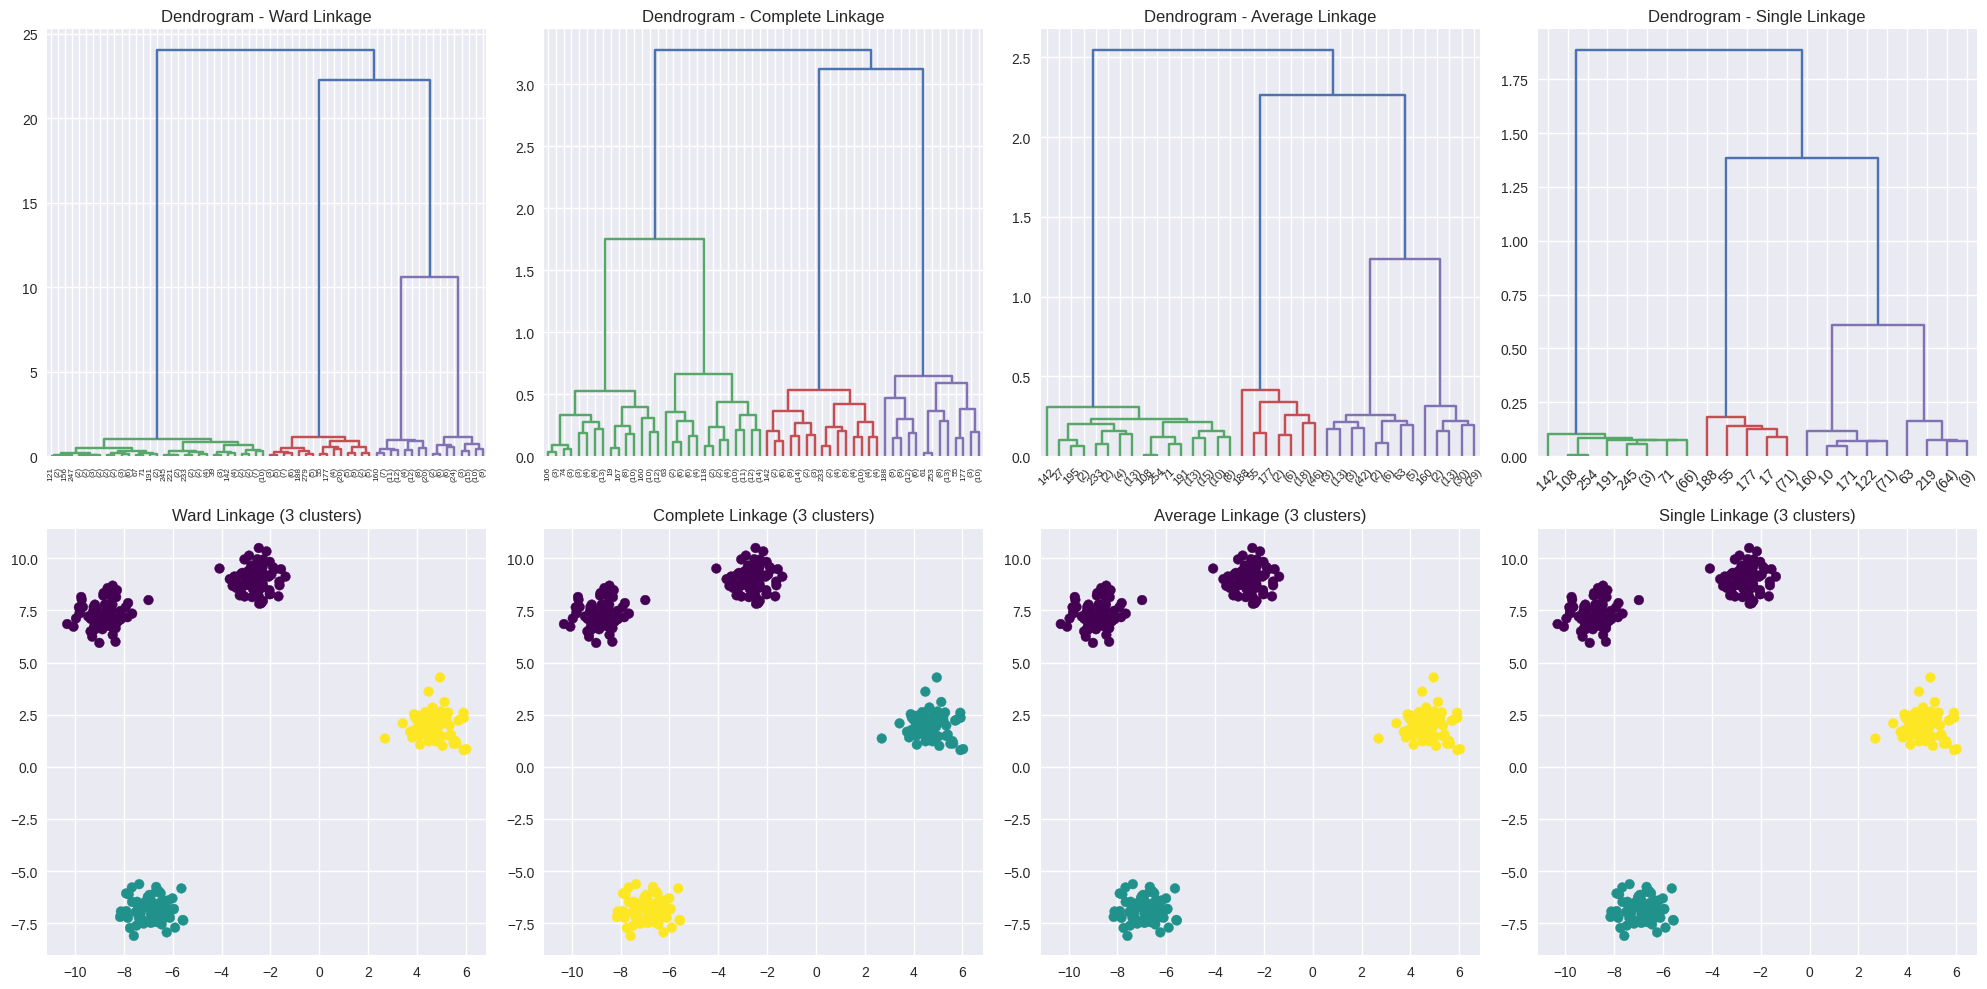

Moons - Ward Linkage Silhouette Score: 0.416
Moons - Complete Linkage Silhouette Score: 0.370
Moons - Average Linkage Silhouette Score: 0.355
Moons - Single Linkage Silhouette Score: 0.290


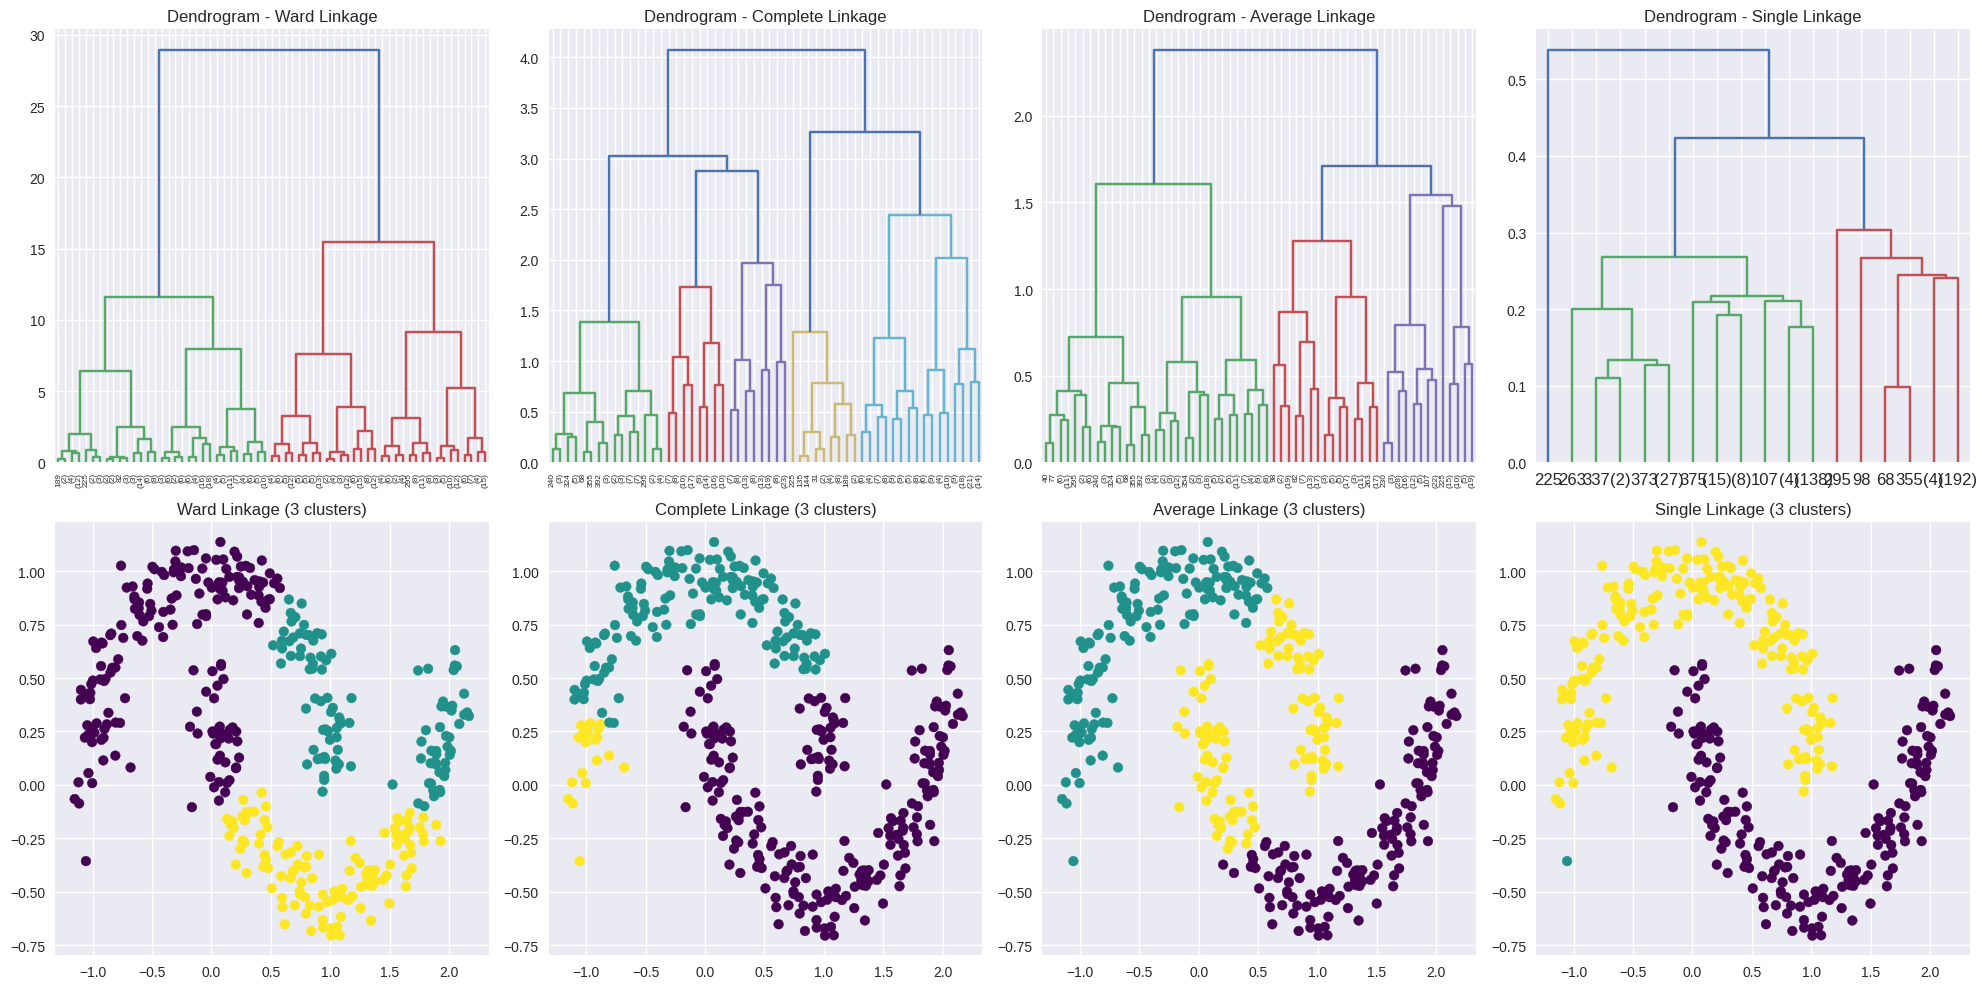

In [4]:
# 4. HIERARCHICAL CLUSTERING
print("\n=== Hierarchical Clustering ===")

def analyze_hierarchical_clustering(X, y_true, title):
    # Standardisasi data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Hitung linkage matrix
    linkage_methods = ['ward', 'complete', 'average', 'single']

    fig, axes = plt.subplots(2, 4, figsize=(20, 10))

    for i, method in enumerate(linkage_methods):
        # Hitung linkage
        Z = linkage(X_scaled, method=method)

        # Plot dendrogram
        axes[0, i].set_title(f'Dendrogram - {method.capitalize()} Linkage')
        dendrogram(Z, ax=axes[0, i], truncate_mode='level', p=5)

        # Hierarchical clustering dengan 3 cluster
        hc = AgglomerativeClustering(n_clusters=3, linkage=method)
        y_pred = hc.fit_predict(X_scaled)

        # Plot hasil clustering
        axes[1, i].scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
        axes[1, i].set_title(f'{method.capitalize()} Linkage (3 clusters)')

        # Hitung silhouette score
        sil_score = silhouette_score(X_scaled, y_pred)
        print(f"{title} - {method.capitalize()} Linkage Silhouette Score: {sil_score:.3f}")

    plt.tight_layout()
    plt.show()

# Analisis Hierarchical Clustering
analyze_hierarchical_clustering(X_blobs, y_blobs, "Blobs")
analyze_hierarchical_clustering(X_moons, y_moons, "Moons")

##5. Gaussian Mixture Models


=== Gaussian Mixture Models ===


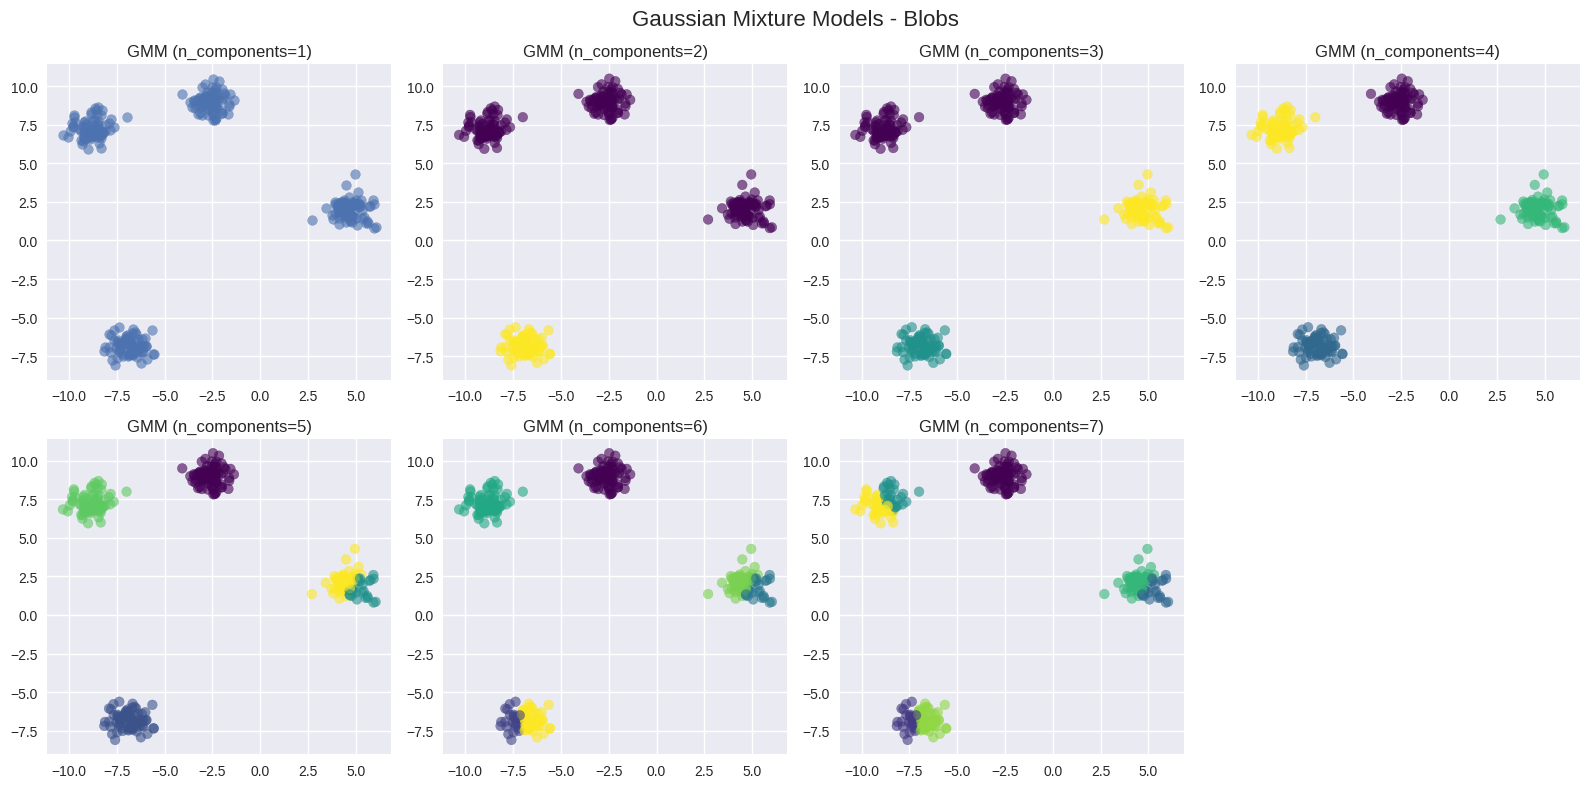

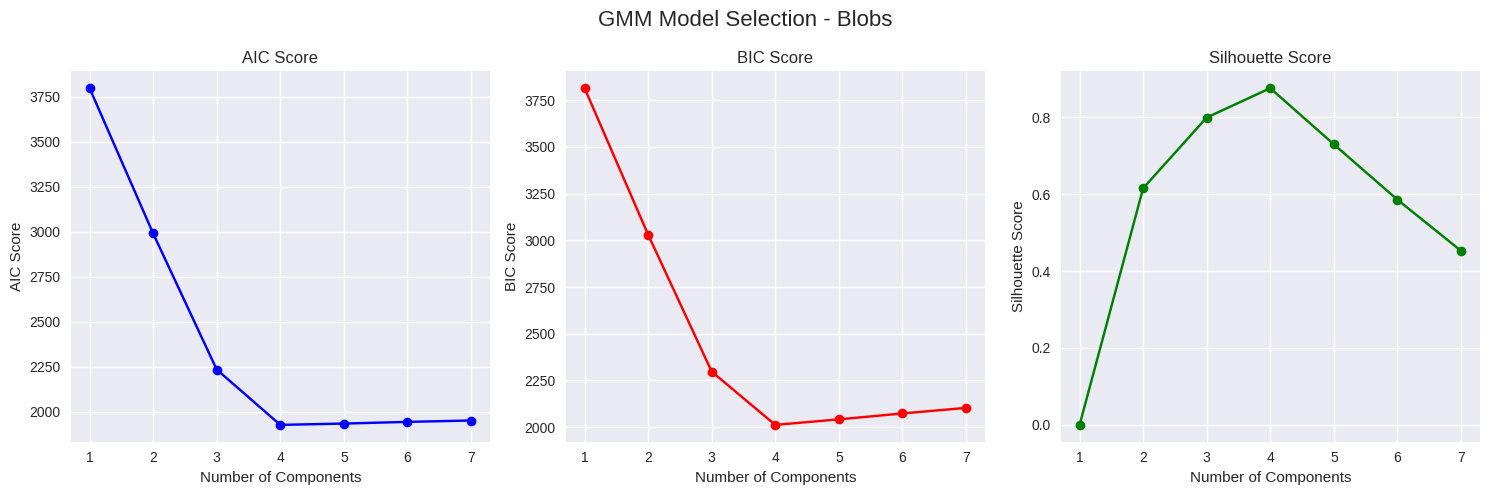

Blobs - Optimal components (BIC): 4
Blobs - Optimal components (Silhouette): 4


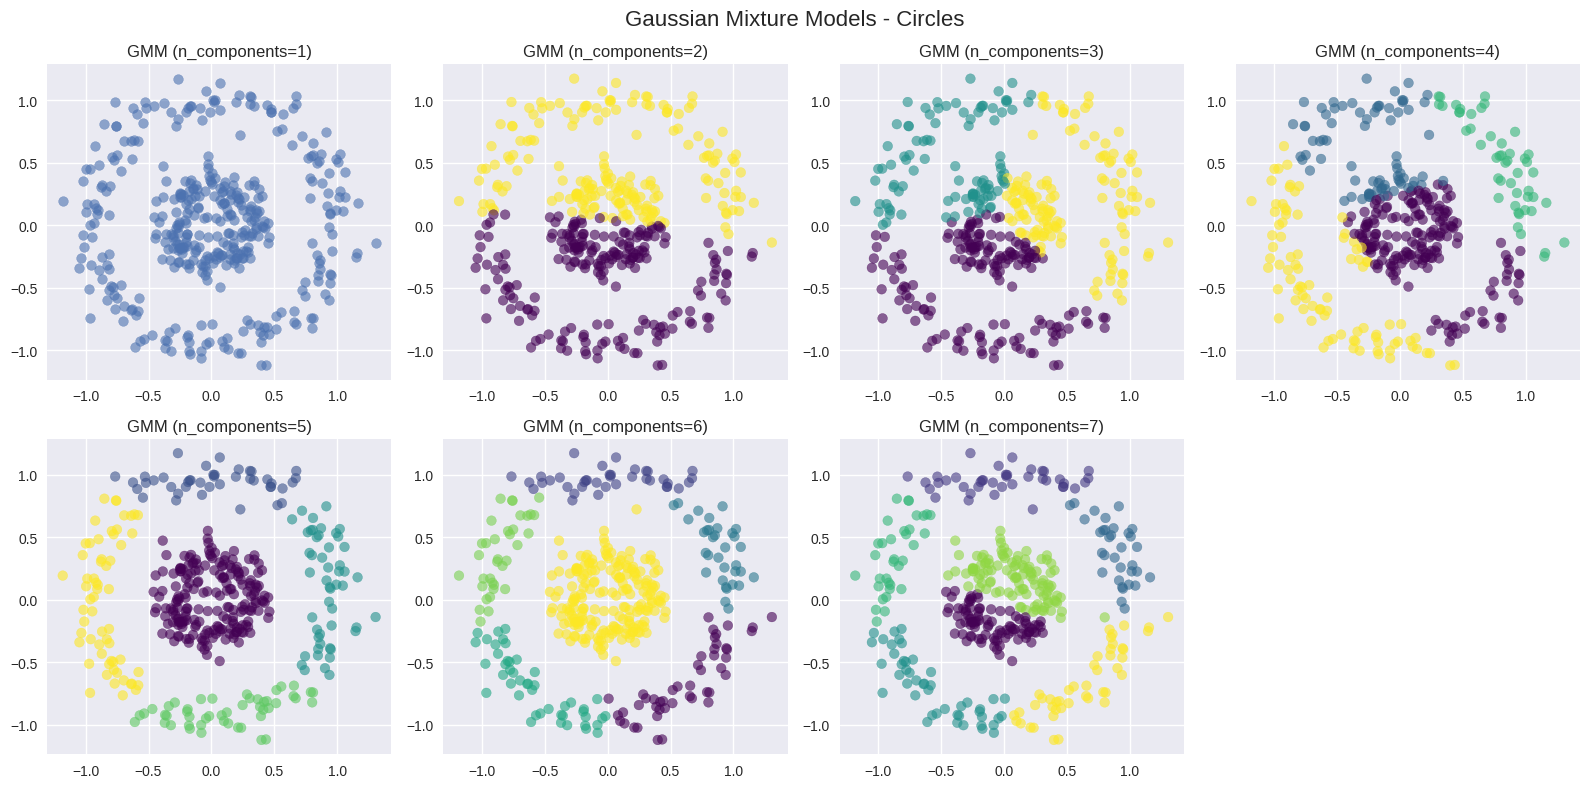

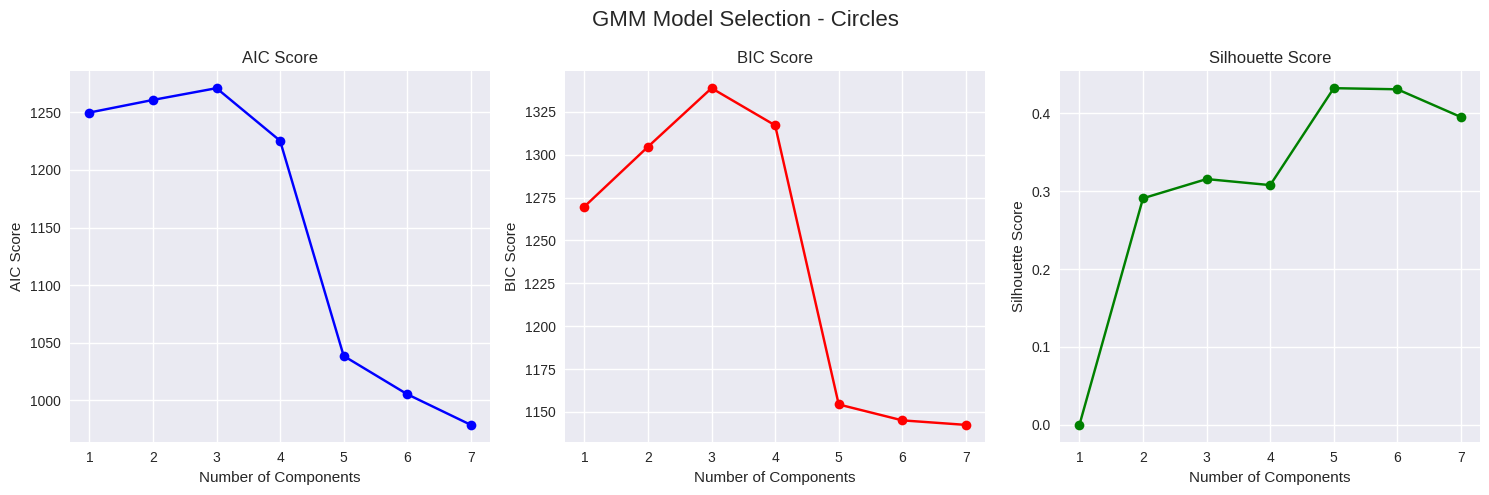

Circles - Optimal components (BIC): 7
Circles - Optimal components (Silhouette): 5


In [5]:
# 5. GAUSSIAN MIXTURE MODELS
print("\n=== Gaussian Mixture Models ===")

def analyze_gmm(X, y_true, title):
    # Test berbagai jumlah komponen
    n_components_range = range(1, 8)
    aic_scores = []
    bic_scores = []
    silhouette_scores = []

    fig, axes = plt.subplots(2, 4, figsize=(16, 8))

    for i, n_components in enumerate(n_components_range):
        # Fit GMM
        gmm = GaussianMixture(n_components=n_components, random_state=42)
        gmm.fit(X)

        # Prediksi cluster
        y_pred = gmm.predict(X)

        # Hitung scores
        aic_scores.append(gmm.aic(X))
        bic_scores.append(gmm.bic(X))

        if n_components > 1:
            sil_score = silhouette_score(X, y_pred)
            silhouette_scores.append(sil_score)
        else:
            silhouette_scores.append(0)

        # Plot hasil (hanya untuk n_components 1-7)
        if i < 7:
            row, col = i // 4, i % 4
            if n_components == 1:
                axes[row, col].scatter(X[:, 0], X[:, 1], alpha=0.6)
            else:
                axes[row, col].scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', alpha=0.6)
            axes[row, col].set_title(f'GMM (n_components={n_components})')

    # Remove empty subplot
    axes[1, 3].remove()

    plt.suptitle(f'Gaussian Mixture Models - {title}', fontsize=16)
    plt.tight_layout()
    plt.show()

    # Plot model selection metrics
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # AIC
    axes[0].plot(n_components_range, aic_scores, 'bo-')
    axes[0].set_xlabel('Number of Components')
    axes[0].set_ylabel('AIC Score')
    axes[0].set_title('AIC Score')
    axes[0].grid(True)

    # BIC
    axes[1].plot(n_components_range, bic_scores, 'ro-')
    axes[1].set_xlabel('Number of Components')
    axes[1].set_ylabel('BIC Score')
    axes[1].set_title('BIC Score')
    axes[1].grid(True)

    # Silhouette Score
    axes[2].plot(n_components_range, silhouette_scores, 'go-')
    axes[2].set_xlabel('Number of Components')
    axes[2].set_ylabel('Silhouette Score')
    axes[2].set_title('Silhouette Score')
    axes[2].grid(True)

    plt.suptitle(f'GMM Model Selection - {title}', fontsize=16)
    plt.tight_layout()
    plt.show()

    # Optimal number of components
    optimal_bic = n_components_range[np.argmin(bic_scores)]
    optimal_sil = n_components_range[np.argmax(silhouette_scores)]

    print(f"{title} - Optimal components (BIC): {optimal_bic}")
    print(f"{title} - Optimal components (Silhouette): {optimal_sil}")

# Analisis GMM
analyze_gmm(X_blobs, y_blobs, "Blobs")
analyze_gmm(X_circles, y_circles, "Circles")


##6. Anomaly Detection


=== Anomaly Detection ===


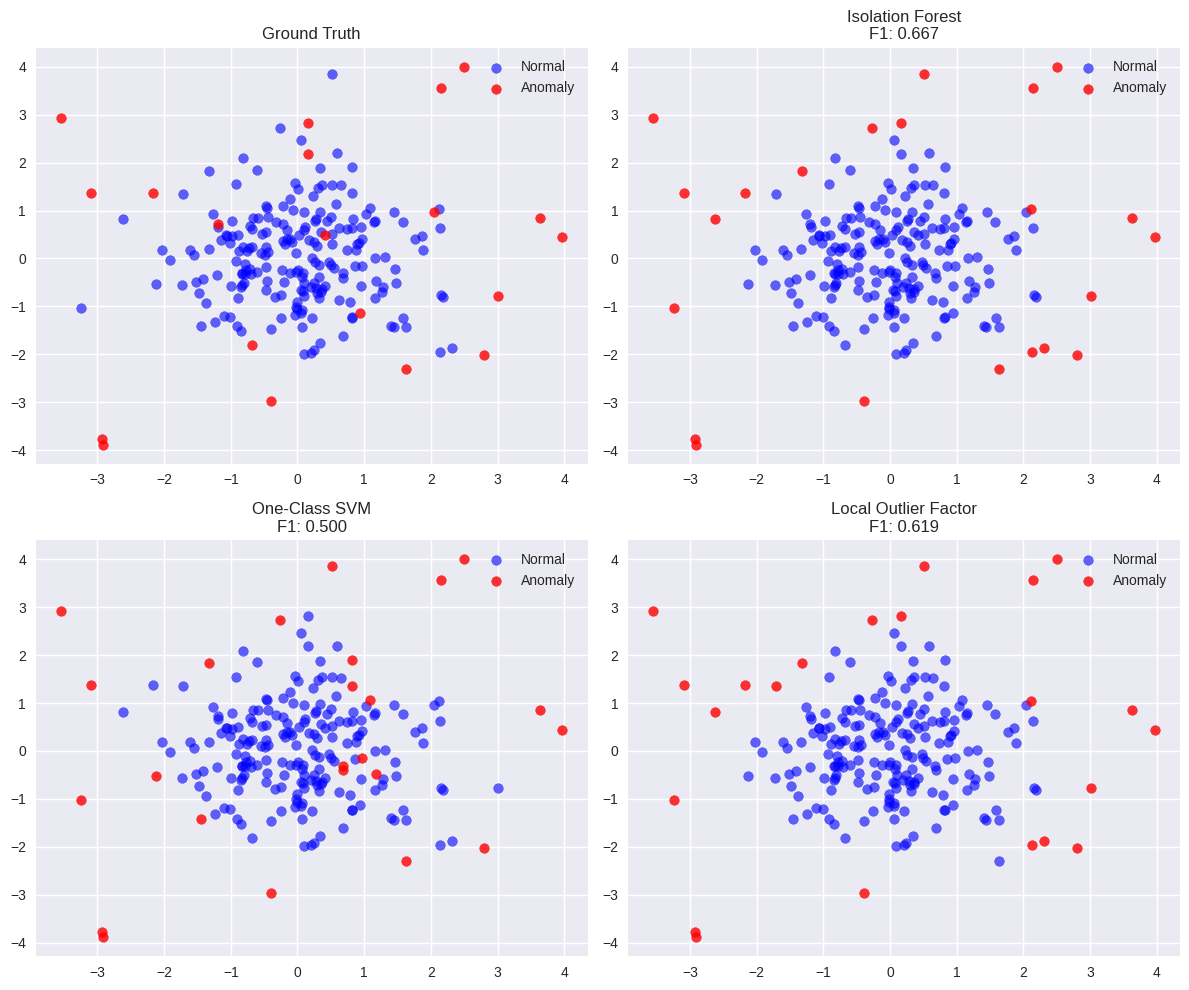

Anomaly Detection Results:
--------------------------------------------------
Isolation Forest    : Precision=0.636, Recall=0.700, F1=0.667
One-Class SVM       : Precision=0.458, Recall=0.550, F1=0.500
Local Outlier Factor: Precision=0.591, Recall=0.650, F1=0.619


In [6]:
# 6. ANOMALY DETECTION
print("\n=== Anomaly Detection ===")

# Generate dataset dengan anomali
np.random.seed(42)
X_normal = np.random.normal(0, 1, (200, 2))
X_anomaly = np.random.uniform(-4, 4, (20, 2))
X_combined = np.vstack([X_normal, X_anomaly])
y_true_anomaly = np.array([0]*200 + [1]*20)  # 0: normal, 1: anomaly

def compare_anomaly_detection_methods(X, y_true):
    """Membandingkan berbagai metode anomaly detection"""

    # Standardisasi data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Berbagai metode anomaly detection
    methods = {
        'Isolation Forest': IsolationForest(contamination=0.1, random_state=42),
        'One-Class SVM': OneClassSVM(nu=0.1),
        'Local Outlier Factor': LocalOutlierFactor(contamination=0.1)
    }

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # Plot data asli
    axes[0, 0].scatter(X[y_true == 0, 0], X[y_true == 0, 1],
                      c='blue', label='Normal', alpha=0.6)
    axes[0, 0].scatter(X[y_true == 1, 0], X[y_true == 1, 1],
                      c='red', label='Anomaly', alpha=0.8)
    axes[0, 0].set_title('Ground Truth')
    axes[0, 0].legend()

    results = {}

    for i, (name, method) in enumerate(methods.items()):
        # Fit dan prediksi
        if name == 'Local Outlier Factor':
            y_pred = method.fit_predict(X_scaled)
        else:
            method.fit(X_scaled)
            y_pred = method.predict(X_scaled)

        # Konversi prediksi (-1: anomaly, 1: normal) ke (1: anomaly, 0: normal)
        y_pred_binary = (y_pred == -1).astype(int)

        # Hitung metrics
        from sklearn.metrics import precision_score, recall_score, f1_score
        precision = precision_score(y_true, y_pred_binary)
        recall = recall_score(y_true, y_pred_binary)
        f1 = f1_score(y_true, y_pred_binary)

        results[name] = {
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        }

        # Plot hasil
        row, col = (i+1) // 2, (i+1) % 2
        normal_mask = y_pred == 1
        anomaly_mask = y_pred == -1

        axes[row, col].scatter(X[normal_mask, 0], X[normal_mask, 1],
                              c='blue', label='Normal', alpha=0.6)
        axes[row, col].scatter(X[anomaly_mask, 0], X[anomaly_mask, 1],
                              c='red', label='Anomaly', alpha=0.8)
        axes[row, col].set_title(f'{name}\nF1: {f1:.3f}')
        axes[row, col].legend()

    plt.tight_layout()
    plt.show()

    # Tampilkan hasil
    print("Anomaly Detection Results:")
    print("-" * 50)
    for method, metrics in results.items():
        print(f"{method:20}: Precision={metrics['precision']:.3f}, "
              f"Recall={metrics['recall']:.3f}, F1={metrics['f1_score']:.3f}")

    return results

# Analisis anomaly detection
anomaly_results = compare_anomaly_detection_methods(X_combined, y_true_anomaly)


##7. Clustering Pada Data Real


=== Clustering pada Digits Dataset ===


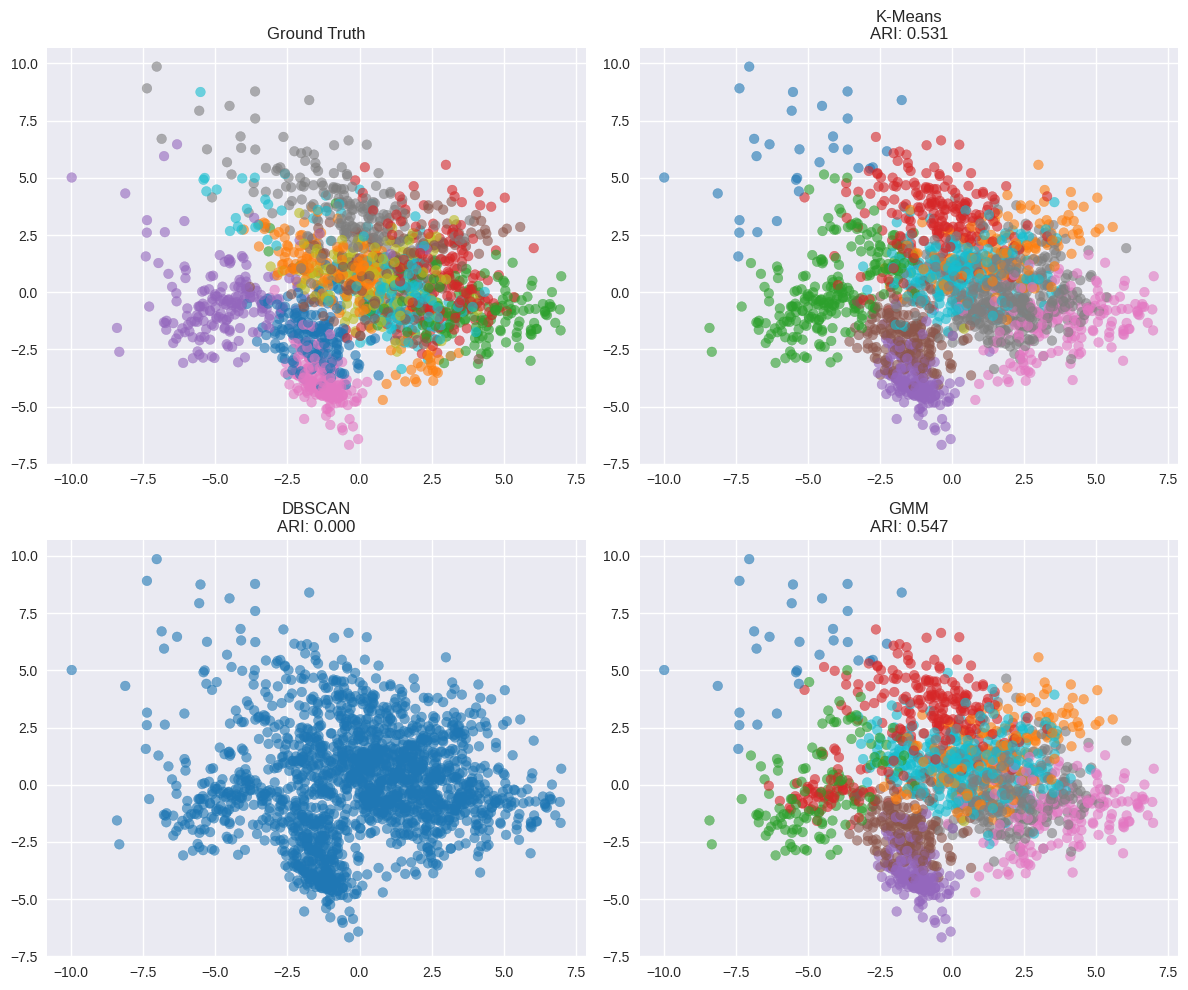

Clustering Results on Digits Dataset:
----------------------------------------
K-Means     : ARI = 0.531
DBSCAN      : ARI = 0.000
GMM         : ARI = 0.547


In [7]:
# 7. CLUSTERING PADA DATA REAL - DIGITS DATASET
print("\n=== Clustering pada Digits Dataset ===")

# Load digits dataset
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

# Standardisasi dan PCA untuk visualisasi
scaler = StandardScaler()
X_digits_scaled = scaler.fit_transform(X_digits)

# PCA untuk visualisasi 2D
pca = PCA(n_components=2)
X_digits_pca = pca.fit_transform(X_digits_scaled)

# Clustering dengan berbagai metode
clustering_methods = {
    'K-Means': KMeans(n_clusters=10, random_state=42),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'GMM': GaussianMixture(n_components=10, random_state=42)
}

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot ground truth
axes[0, 0].scatter(X_digits_pca[:, 0], X_digits_pca[:, 1], c=y_digits,
                   cmap='tab10', alpha=0.6)
axes[0, 0].set_title('Ground Truth')

clustering_results = {}

for i, (name, method) in enumerate(clustering_methods.items()):
    # Fit clustering method
    if name == 'DBSCAN':
        y_pred = method.fit_predict(X_digits_scaled)
    else:
        y_pred = method.fit_predict(X_digits_scaled)

    # Hitung Adjusted Rand Index
    ari = adjusted_rand_score(y_digits, y_pred)
    clustering_results[name] = ari

    # Plot hasil
    row, col = (i+1) // 2, (i+1) % 2
    axes[row, col].scatter(X_digits_pca[:, 0], X_digits_pca[:, 1],
                          c=y_pred, cmap='tab10', alpha=0.6)
    axes[row, col].set_title(f'{name}\nARI: {ari:.3f}')

plt.tight_layout()
plt.show()

print("Clustering Results on Digits Dataset:")
print("-" * 40)
for method, ari in clustering_results.items():
    print(f"{method:12}: ARI = {ari:.3f}")


##8. Perbandingan Komprehensif


=== Perbandingan Komprehensif ===


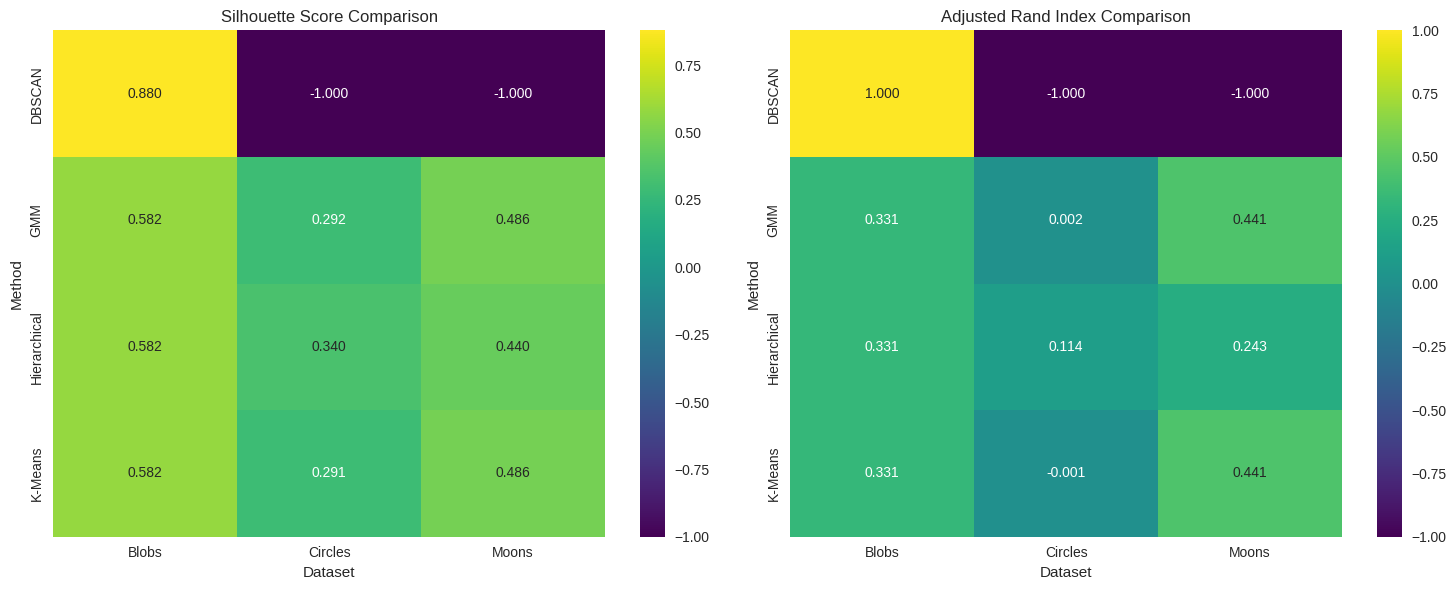

=== Rangkuman dan Rekomendasi ===

Berdasarkan analisis yang telah dilakukan:

1. K-MEANS:
   - Terbaik untuk: Cluster spherical dengan ukuran serupa
   - Contoh: Blob dataset
   - Kelemahan: Tidak baik untuk cluster non-linear

2. DBSCAN:
   - Terbaik untuk: Cluster dengan bentuk arbitrary dan deteksi outliers
   - Contoh: Moon dan Circle datasets
   - Kelemahan: Sensitive terhadap parameter

3. HIERARCHICAL CLUSTERING:
   - Terbaik untuk: Eksplorasi struktur hirarki data
   - Keuntungan: Tidak perlu tentukan jumlah cluster
   - Kelemahan: Komputasi expensive untuk dataset besar

4. GAUSSIAN MIXTURE MODELS:
   - Terbaik untuk: Soft clustering dan data dengan distribusi Gaussian
   - Keuntungan: Memberikan probabilitas membership
   - Kelemahan: Asumsi distribusi Gaussian

5. ANOMALY DETECTION:
   - Isolation Forest: Baik untuk high-dimensional data
   - One-Class SVM: Robust tapi sensitive terhadap parameter
   - LOF: Baik untuk mendeteksi anomali berdasarkan density lokal

REKOMENDAS

In [10]:
# 8. PERBANDINGAN KOMPREHENSIF
print("\n=== Perbandingan Komprehensif ===")

def comprehensive_clustering_comparison():
    """Perbandingan komprehensif semua metode clustering"""

    datasets = {
        'Blobs': (X_blobs, y_blobs),
        'Circles': (X_circles, y_circles),
        'Moons': (X_moons, y_moons)
    }

    methods = {
        'K-Means': lambda X: KMeans(n_clusters=2, random_state=42).fit_predict(X),
        'DBSCAN': lambda X: DBSCAN(eps=0.3, min_samples=5).fit_predict(X),
        'GMM': lambda X: GaussianMixture(n_components=2, random_state=42).fit_predict(X),
        'Hierarchical': lambda X: AgglomerativeClustering(n_clusters=2).fit_predict(X)
    }

    results_df = []

    for dataset_name, (X, y_true) in datasets.items():
        # Standardisasi
        X_scaled = StandardScaler().fit_transform(X)

        for method_name, method_func in methods.items():
            try:
                y_pred = method_func(X_scaled)

                # Hitung metrics
                if len(np.unique(y_pred)) > 1 and -1 not in y_pred:
                    sil_score = silhouette_score(X_scaled, y_pred)
                    ari_score = adjusted_rand_score(y_true, y_pred)
                else:
                    sil_score = -1
                    ari_score = -1

                results_df.append({
                    'Dataset': dataset_name,
                    'Method': method_name,
                    'Silhouette Score': sil_score,
                    'Adjusted Rand Index': ari_score
                })

            except Exception as e:
                print(f"Error with {method_name} on {dataset_name}: {e}")
                results_df.append({
                    'Dataset': dataset_name,
                    'Method': method_name,
                    'Silhouette Score': -1,
                    'Adjusted Rand Index': -1
                })

    # Convert to DataFrame
    results_df = pd.DataFrame(results_df)

    # Pivot table untuk visualisasi
    pivot_sil = results_df.pivot(index='Method', columns='Dataset',
                                values='Silhouette Score')
    pivot_ari = results_df.pivot(index='Method', columns='Dataset',
                                values='Adjusted Rand Index')

    # Visualisasi heatmap
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    sns.heatmap(pivot_sil, annot=True, cmap='viridis', ax=ax1, fmt='.3f')
    ax1.set_title('Silhouette Score Comparison')

    sns.heatmap(pivot_ari, annot=True, cmap='viridis', ax=ax2, fmt='.3f')
    ax2.set_title('Adjusted Rand Index Comparison')

    plt.tight_layout()
    plt.show()

    return results_df

    # Jalankan perbandingan komprehensif
comparison_results = comprehensive_clustering_comparison()

print("=== Rangkuman dan Rekomendasi ===")
print("""
Berdasarkan analisis yang telah dilakukan:

1. K-MEANS:
   - Terbaik untuk: Cluster spherical dengan ukuran serupa
   - Contoh: Blob dataset
   - Kelemahan: Tidak baik untuk cluster non-linear

2. DBSCAN:
   - Terbaik untuk: Cluster dengan bentuk arbitrary dan deteksi outliers
   - Contoh: Moon dan Circle datasets
   - Kelemahan: Sensitive terhadap parameter

3. HIERARCHICAL CLUSTERING:
   - Terbaik untuk: Eksplorasi struktur hirarki data
   - Keuntungan: Tidak perlu tentukan jumlah cluster
   - Kelemahan: Komputasi expensive untuk dataset besar

4. GAUSSIAN MIXTURE MODELS:
   - Terbaik untuk: Soft clustering dan data dengan distribusi Gaussian
   - Keuntungan: Memberikan probabilitas membership
   - Kelemahan: Asumsi distribusi Gaussian

5. ANOMALY DETECTION:
   - Isolation Forest: Baik untuk high-dimensional data
   - One-Class SVM: Robust tapi sensitive terhadap parameter
   - LOF: Baik untuk mendeteksi anomali berdasarkan density lokal

REKOMENDASI PEMILIHAN ALGORITMA:
- Gunakan K-Means untuk clustering cepat pada data dengan cluster spherical
- Gunakan DBSCAN untuk data dengan noise dan cluster non-spherical
- Gun
""")